In [5]:
import pandas as pd  
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [31]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 19,
         'axes.titlesize':23,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [23]:
def set_labels(title, xlabel="", ylabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [21]:
df = pd.read_csv("INpreprocessed.csv")

In [3]:
df.isnull().sum()

video_id                    0
title                       0
channel_title               0
category_id                 0
views                       0
likes                       0
dislikes                    0
comment_count               0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               250
trend_date                  0
trend_month                 0
trend_year                  0
pub_date                    0
pub_month                   0
pub_year                    0
pub_hour                    0
file_path                   0
dtype: int64

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour
count,30098.000000,3.009800e+04,3.009800e+04,3.009800e+04,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000
mean,21.408997,1.182208e+06,3.190725e+04,1.921989e+03,3159.406705,5.283341,15.858462,17.766131,15.775168,5.344873,17.755432,10.616586
std,6.749239,3.475862e+06,1.066138e+05,1.788343e+04,16457.743049,3.795210,8.809644,0.423297,8.765619,3.831658,0.429838,5.044901
min,1.000000,4.287000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,17.000000,0.000000
25%,23.000000,1.369780e+05,1.131000e+03,1.300000e+02,112.000000,2.000000,8.000000,18.000000,8.000000,2.000000,18.000000,6.000000
50%,24.000000,3.378320e+05,4.066000e+03,3.850000e+02,435.000000,4.000000,16.000000,18.000000,16.000000,4.000000,18.000000,11.000000
75%,24.000000,8.799642e+05,1.856925e+04,1.163000e+03,1603.000000,6.000000,23.000000,18.000000,23.000000,6.000000,18.000000,14.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,12.000000,31.000000,18.000000,31.000000,12.000000,18.000000,23.000000


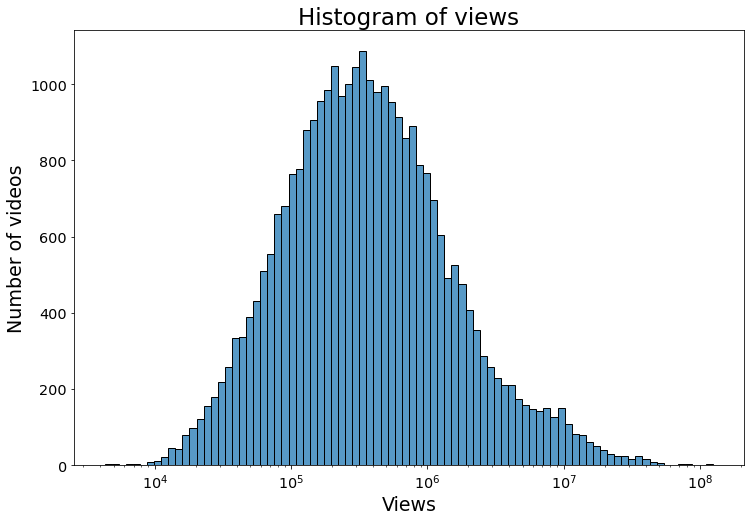

In [40]:
sns.histplot(df['views'], log_scale=True)
set_labels("Histogram of views", "Views", "Number of videos")
plt.show()

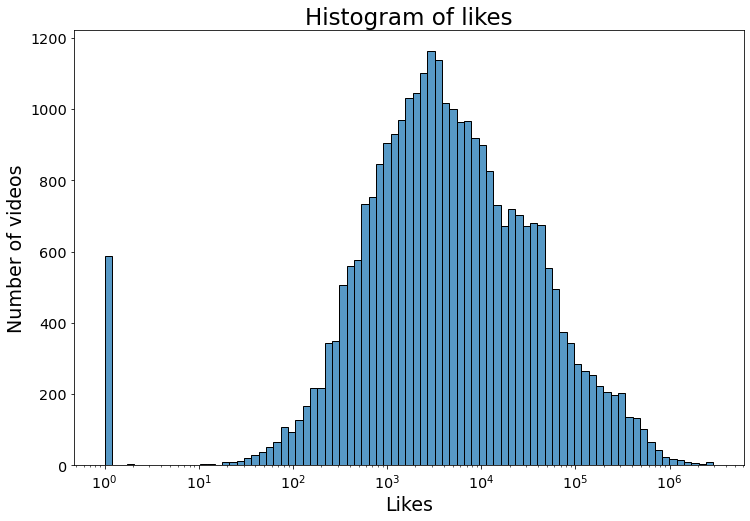

In [39]:
sns.histplot(df['likes']+1, log_scale=True)
set_labels("Histogram of likes", "Likes", "Number of videos")
plt.show()

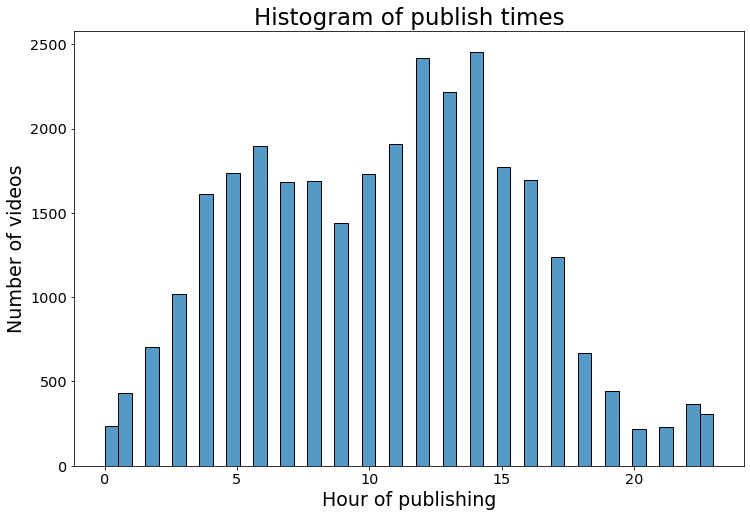

In [87]:
sns.histplot(df['pub_hour'])
set_labels("Histogram of publish times", "Hour of publishing", "Number of videos")
plt.show()

In [88]:
# when converted to IST, these times indicate peaks at 12pm and 7 pm

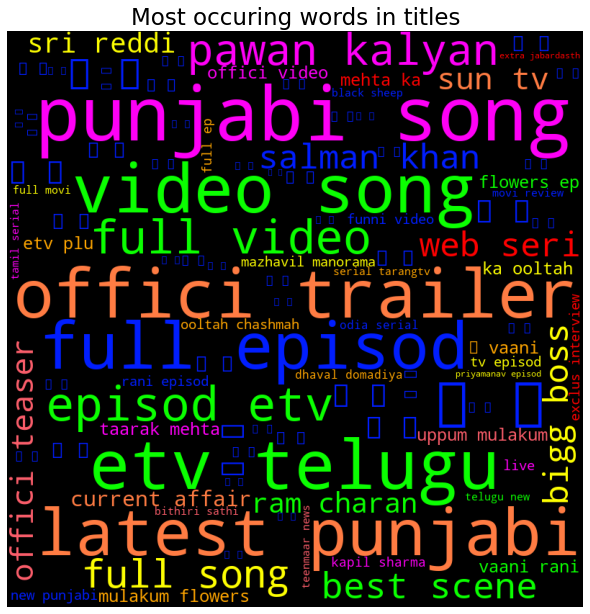

In [54]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#fe0000", "#fdfe02", "#0bff01", "#011efe", "#fe00f6", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

title  = df['title']

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in title: 
    
    val = str(val) 
    tokens = val.split() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                    stopwords = stopwords, 
                    min_font_size = 10, background_color="#000000",
                    color_func=col_func, max_words=100).generate(comment_words) 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Most occuring words in titles")

plt.show()

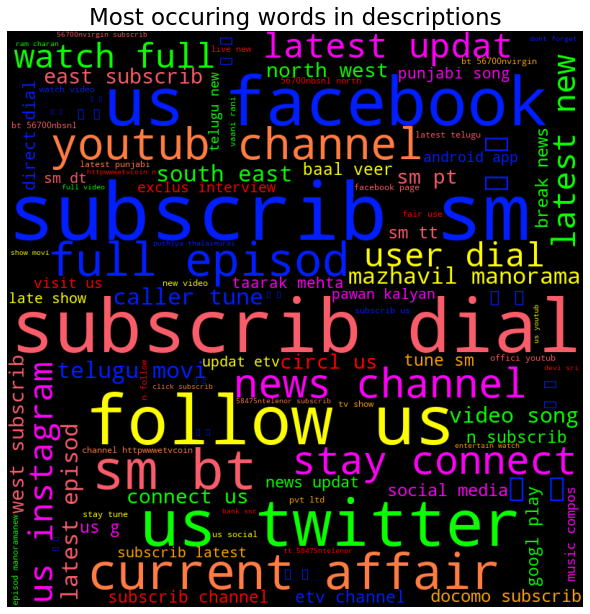

In [56]:
desc  = df['description']

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in desc: 
    
    val = str(val) 
    tokens = val.split() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='#000000', 
                    stopwords = stopwords, color_func=col_func,
                    min_font_size = 10, max_words=100).generate(comment_words) 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Most occuring words in descriptions")

plt.show()

In [46]:
# videos that trended for the longest
most_trending = df.groupby('video_id').size().sort_values(ascending=False).head(10)
idx = most_trending.index.values
tdf = df[df['video_id'].isin(idx)].drop_duplicates(subset=['video_id'])
tdf['trending_days'] = tdf['video_id'].map(most_trending)
display(tdf)

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,...,description,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour,file_path,trending_days
105,#NAME?,స‌మంత కంట‌త‌డి samantha becam emot samantha na...,Friday Poster,24,31052,36,11,2,False,False,...,స‌మంత కంట‌త‌డి samantha becam emot samantha na...,11,14,17,13,11,17,8,https://raw.githubusercontent.com/sheelfshah/i...,417
14726,yFFL1we4j_Y,mill lo na guri ft sukh full song jaani satti ...,Geet MP3,10,2168315,117689,6907,10407,False,False,...,geet mp3 gkdigit present new track mill lo na ...,2,27,18,26,2,18,12,https://raw.githubusercontent.com/sheelfshah/i...,13
20346,bYSRPuDEnTg,garmi ke sideeffect ashish chanchlani,ashish chanchlani vines,23,4227847,387791,9279,24003,False,False,...,made special video summer season younkya aap b...,4,14,18,13,4,18,14,https://raw.githubusercontent.com/sheelfshah/i...,13
22102,rRr1qiJRsXk,sanju offici teaser ranbir kapoor rajkumar hirani,FoxStarHindi,24,18639195,511763,15606,32435,False,False,...,live time dramat enigmat saga sanjay dutt come...,4,25,18,24,4,18,7,https://raw.githubusercontent.com/sheelfshah/i...,16
25778,y-PQiShdTKA,tochan full video sidhu moosewala byg byrd son...,Humble Music,10,5659320,112530,3180,10480,False,False,...,humbl music present tochan singer sidhu moosew...,5,18,18,17,5,18,7,https://raw.githubusercontent.com/sheelfshah/i...,13
27794,1J76wN0TPI4,sanju offici trailer ranbir kapoor rajkumar hi...,FoxStarHindi,24,21739537,549875,16991,41068,False,False,...,live time dramat enigmat saga sanjay dutt come...,5,31,18,30,5,18,7,https://raw.githubusercontent.com/sheelfshah/i...,14
27795,WDiK14qI3pQ,restaur sutiyapa ashish chanchlani,ashish chanchlani vines,23,4613979,337315,15396,27261,False,False,...,present youth type peopl find indian restaur “...,5,31,18,30,5,18,13,https://raw.githubusercontent.com/sheelfshah/i...,13
27805,l7E0kTvARsA,golak bugni bank te batua full movi hd harish ...,Rhythm Boyz,30,225528,9336,222,438,False,False,...,rhythm boyz entertain hayr omje studio present...,5,31,18,31,5,18,13,https://raw.githubusercontent.com/sheelfshah/i...,14
28564,5hpkINjCf7A,result ka mahool amit bhadana,Amit Bhadana,24,3385971,326085,9541,38656,False,False,...,video intens result days♠ download loco app ht...,6,5,18,4,6,18,15,https://raw.githubusercontent.com/sheelfshah/i...,12
28787,C1Pn5Ln1R4M,कस्टमर केयर वाली छोरिया राजस्थानी सुपरहिट कॉमे...,RDC Rajasthani,23,75248,1572,170,101,False,False,...,कस्टमर केयर वाली छोरिया राजस्थानी सुपरहिट कॉमे...,6,6,18,6,6,18,8,https://raw.githubusercontent.com/sheelfshah/i...,13


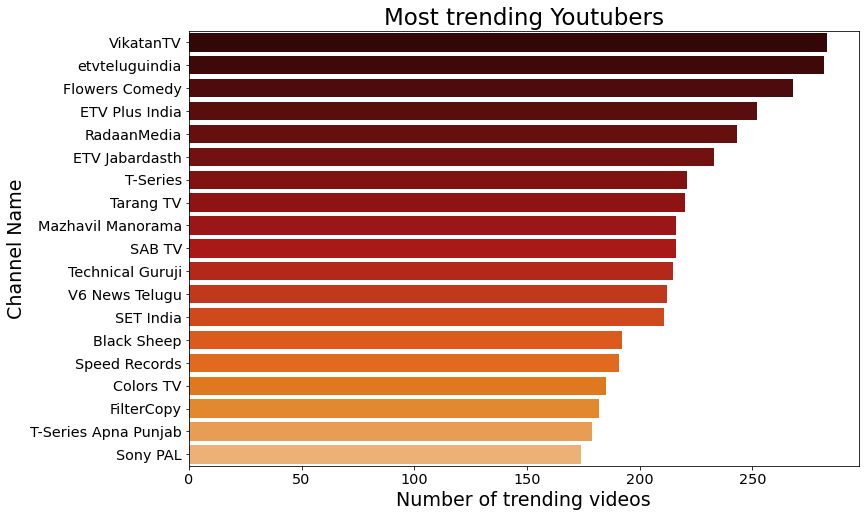

In [59]:
# channels with most trending videos
tdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(19)
sns.barplot(x="video_count", y="channel_title", data=tdf,
            palette=sns.color_palette('gist_heat', n_colors=25)[3:]);
set_labels("Most trending Youtubers", "Number of trending videos", "Channel Name")
plt.show()

In [60]:
import json

with open('categories.json') as f:
  categories = json.load(f)

In [67]:
cat_map={}
for cat in categories["items"]:
    cat_map[cat["id"]]=cat["snippet"]["title"]

In [73]:
def get_cat(n):
    try:
        return cat_map[str(n)]
    except:
        return "Other"

In [74]:
df["category_id"]=df["category_id"].apply(get_cat)

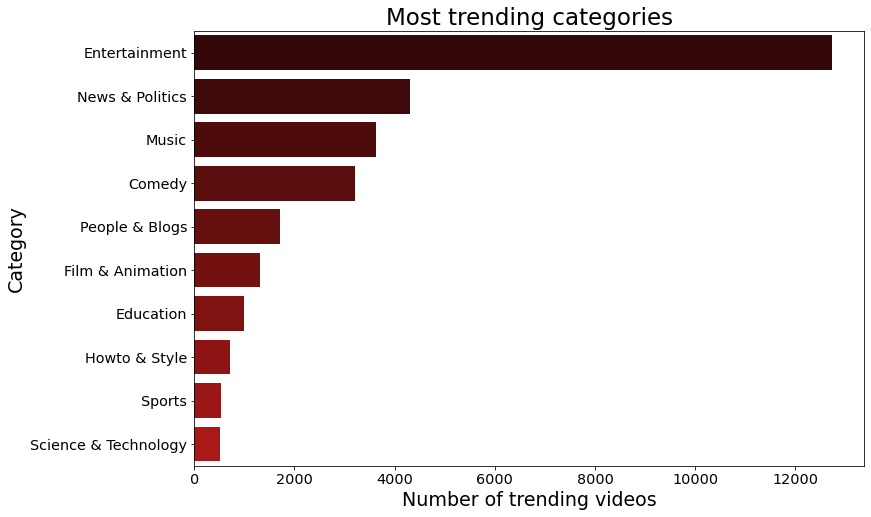

In [76]:
# categories with most trending videos
tdf = df.groupby("category_id").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(10)
sns.barplot(x="video_count", y="category_id", data=tdf,
            palette=sns.color_palette('gist_heat', n_colors=25)[3:]);
set_labels("Most trending categories", "Number of trending videos", "Category")
plt.show()